In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train =pd.read_csv(r"C:\Users\HIM\Desktop\monsoon\X_train.csv")
y = pd.read_csv(r"C:\Users\HIM\Desktop\monsoon\y_train.csv")
test = pd.read_csv(r"C:\Users\HIM\Desktop\monsoon\X_validation.csv")

In [3]:
train = train.merge(y, on='Unique_ID', how='left')


## Filling Null vlaues 
### We will fill null values of those columns which have number of null less than 10% size of dataset. I am using mean value to fill the null values

In [4]:
a = []
for i in train.columns[9:-1]:
    if 3000 > train[i].isnull().sum():
        a.append(i)
b = []
for i in test.columns[9:]:
    if 1000 > test[i].isnull().sum():
        b.append(i)


In [5]:
for c in a:
    mean = np.mean(train[c])
    train[c].fillna(mean,inplace=True)

for c in b:
    mean = np.mean(test[c])
    test[c].fillna(mean,inplace=True)


In [6]:
train.isnull().sum(), test.isnull().sum()

(Unique_ID                 0
 C1                        0
 C2                        0
 C3                        0
 C4                        0
 C5                        0
 C6                        0
 C7                        0
 C8                        0
 N1                        0
 N2                     4612
 N3                        0
 N4                     4606
 N5                     4606
 N6                        0
 N7                        0
 N8                        0
 N9                        0
 N10                       0
 N11                       0
 N12                    4614
 N13                       0
 N14                       0
 N15                       0
 N16                    4606
 N17                    4606
 N18                    4606
 N19                    4571
 N20                    4571
 N21                    4571
 N22                    4571
 N23                    2486
 N24                       0
 N25                   26779
 N26          

## log transformation for skewed variables

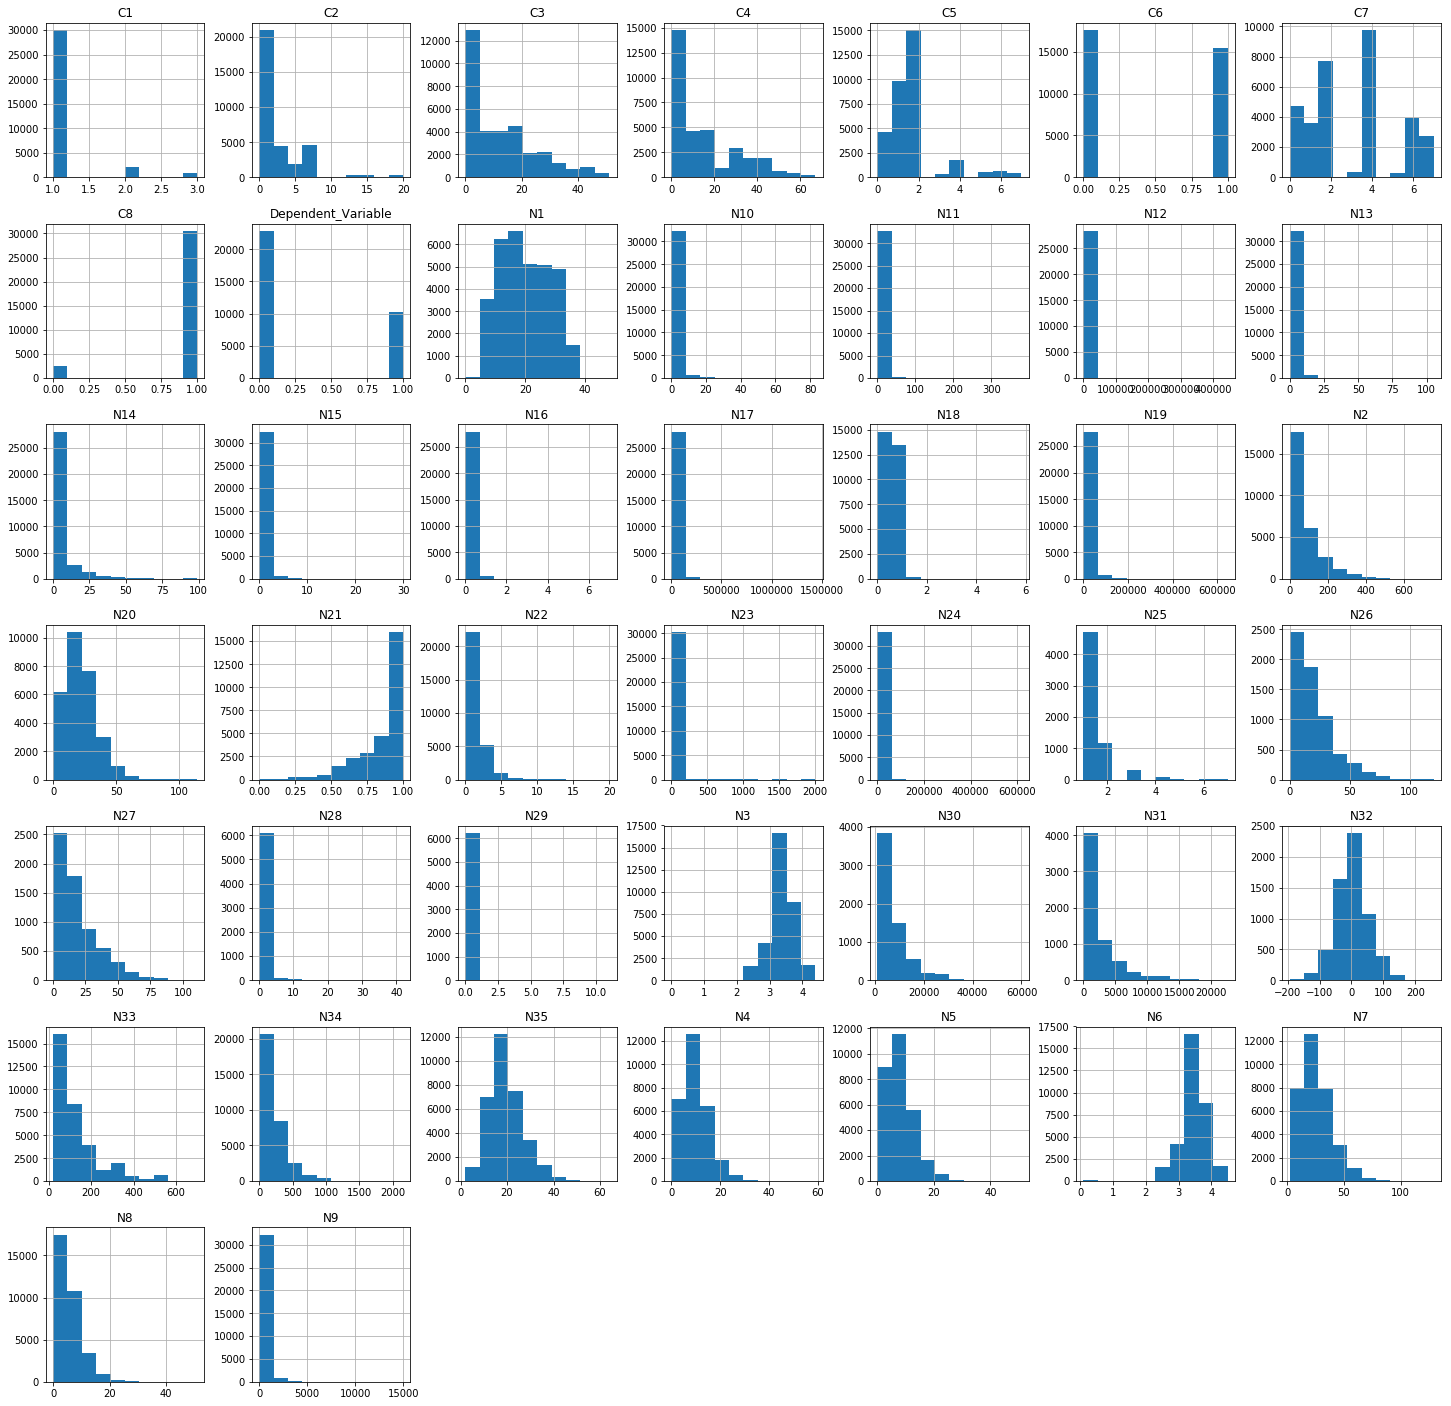

In [7]:
train.hist(figsize=(25,25))
plt.show()

In [6]:
from scipy.stats import skew
#log transform skewed numeric features:

skewed_feats = train[train.columns[9:-1]].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_featspos = skewed_feats[skewed_feats > 0.75]
skewed_featsneg = skewed_feats[skewed_feats < -0.75]
skewed_featspos = skewed_featspos.index
skewed_featsneg = skewed_featsneg.index

train[skewed_featspos] = np.log1p(train[skewed_featspos])
train[skewed_featsneg] = np.log1p(train[skewed_featsneg])


In [7]:
skewed_feats = test[test.columns[9:]].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_featspos = skewed_feats[skewed_feats > 0.75]
skewed_featsneg = skewed_feats[skewed_feats < -0.75]
skewed_featspos = skewed_featspos.index
skewed_featsneg = skewed_featsneg.index

test[skewed_featspos] = np.log1p(test[skewed_featspos])
test[skewed_featsneg] = np.log1p(test[skewed_featsneg])


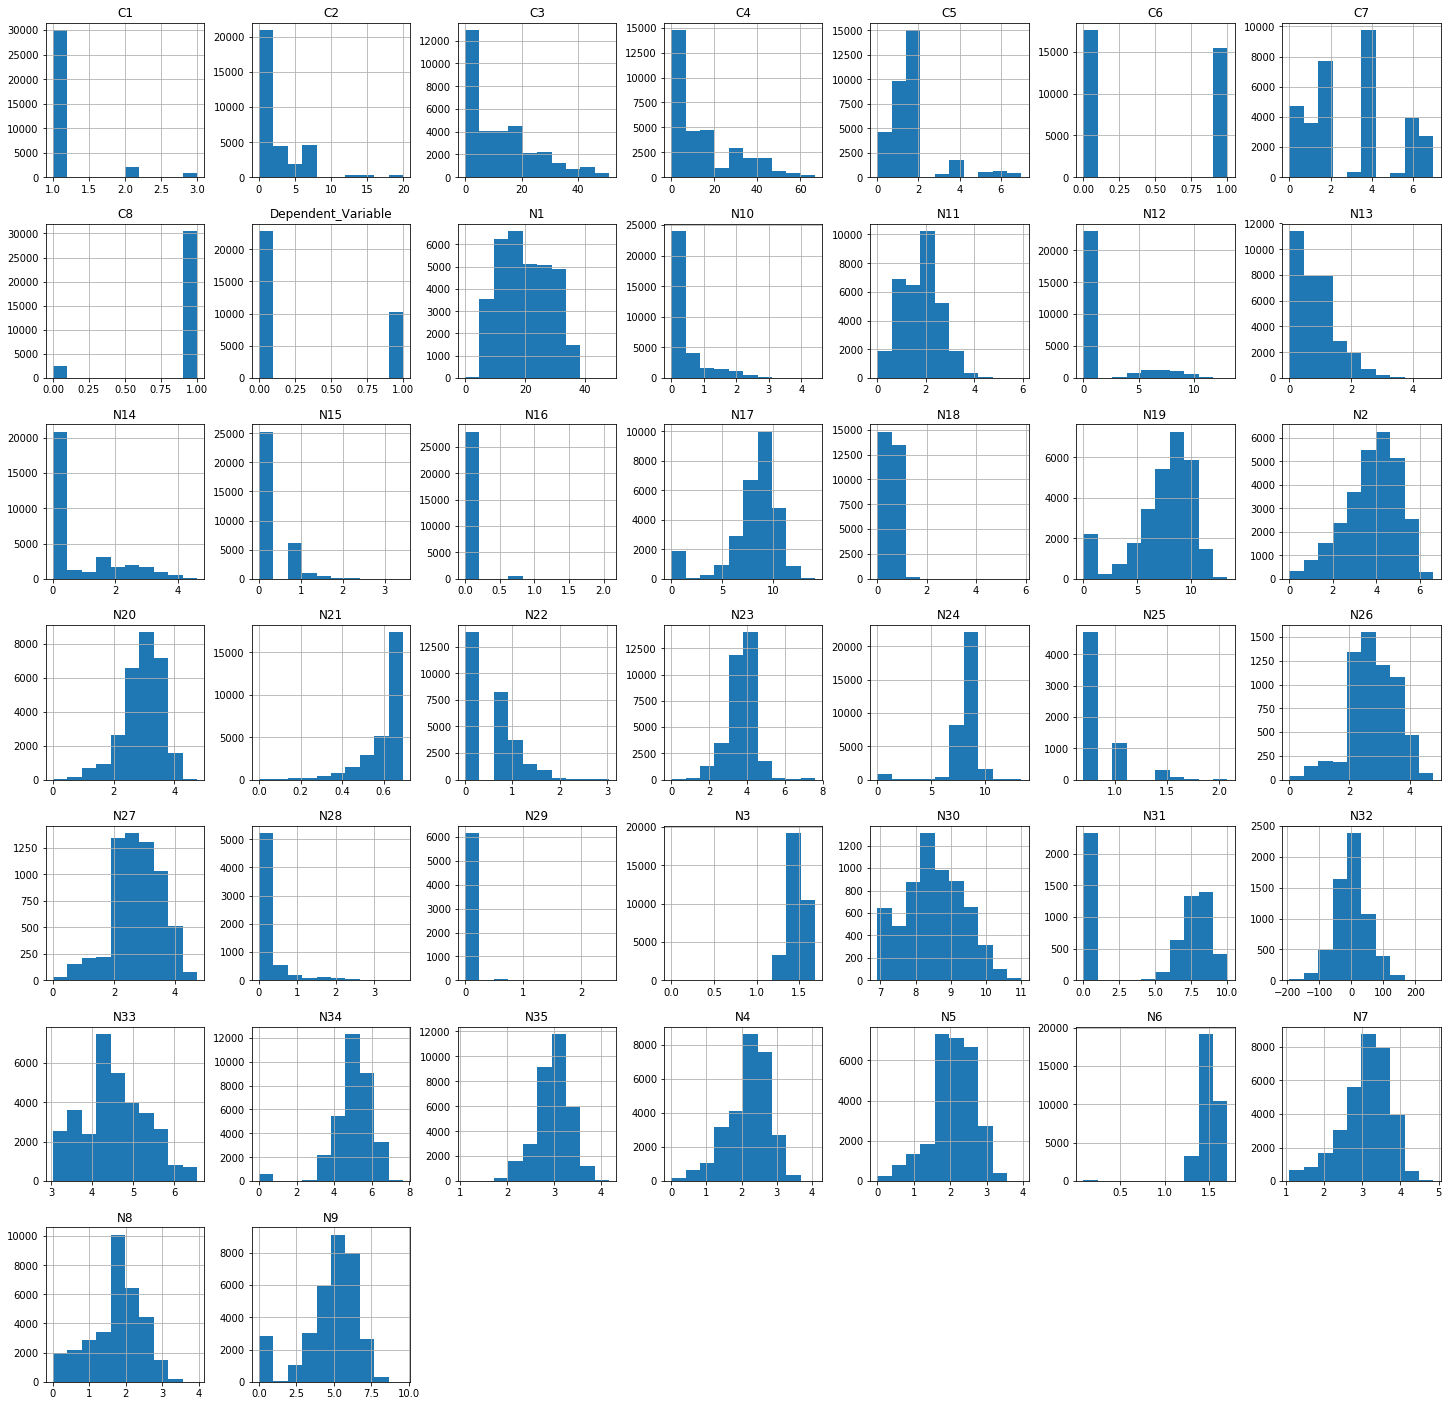

In [8]:
train.hist(figsize=(25,25))
plt.show()

### I am not removing outliers as variables are masked and do not have proper knowledge about them and by looking above plots I think they have some meaning to Dependent_Variable

In [11]:
"train[np.abs(train.N6-train.N6.mean())<=(3*train.N6.std())].N6.describe() " #removing outliers

'train[np.abs(train.N6-train.N6.mean())<=(3*train.N6.std())].N6.describe() '

In [13]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': .9,
    'objective': 'binary:logistic',
    'silent': 1,
    'alpha':12,
    "colsample_bytree": .9,
    'tree_method' : "hist"
   #'min_child_weight': 8,
   # 'nthread':4
}
dtrain = xgb.DMatrix(train.drop(['Unique_ID','Dependent_Variable','N29','C8'],axis=1),train.Dependent_Variable) #removing lowest
                                                                                                            #important features


In [14]:


# cross-validation
xgb.cv(xgb_params, 
                   dtrain, 
                   nfold=5,
                   num_boost_round=700,
                   early_stopping_rounds=50,
                   verbose_eval=10, 
                   show_stdv=False,
                    maximize=True,
                     metrics = {'auc'}
                    )

[0]	train-auc:0.678948	test-auc:0.668718
[10]	train-auc:0.738661	test-auc:0.73051
[20]	train-auc:0.746703	test-auc:0.736548
[30]	train-auc:0.752134	test-auc:0.74118
[40]	train-auc:0.756994	test-auc:0.744848
[50]	train-auc:0.76292	test-auc:0.749496
[60]	train-auc:0.76773	test-auc:0.753369
[70]	train-auc:0.771997	test-auc:0.756762
[80]	train-auc:0.775267	test-auc:0.759302
[90]	train-auc:0.778303	test-auc:0.761293
[100]	train-auc:0.78116	test-auc:0.763162
[110]	train-auc:0.783478	test-auc:0.764583
[120]	train-auc:0.785559	test-auc:0.765817
[130]	train-auc:0.787565	test-auc:0.766991
[140]	train-auc:0.789591	test-auc:0.768094
[150]	train-auc:0.79128	test-auc:0.768973
[160]	train-auc:0.792967	test-auc:0.769777
[170]	train-auc:0.794438	test-auc:0.770455
[180]	train-auc:0.795905	test-auc:0.771074
[190]	train-auc:0.797209	test-auc:0.771606
[200]	train-auc:0.798447	test-auc:0.772158
[210]	train-auc:0.799765	test-auc:0.772448
[220]	train-auc:0.801004	test-auc:0.772845
[230]	train-auc:0.802037	tes

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.668718,0.009059,0.678948,0.003538
1,0.711309,0.009402,0.719023,0.002646
2,0.719719,0.008418,0.727040,0.001756
3,0.722359,0.006772,0.729657,0.002630
4,0.724017,0.007616,0.730378,0.002565
5,0.724956,0.007995,0.731861,0.002072
6,0.726302,0.008481,0.733673,0.001960
7,0.727009,0.007969,0.734525,0.002651
8,0.727910,0.007770,0.735723,0.003087
9,0.729072,0.007636,0.737105,0.003358


In [15]:
xgbmodel = xgb.train(xgb_params, 
                   dtrain, 
                    num_boost_round=600,
                   )

In [16]:
xgbpred = xgbmodel.predict(xgb.DMatrix(test.drop(['Unique_ID','C8','N29'],axis=1)))

In [18]:
import catboost as cat

In [20]:
catmodel = cat.CatBoostClassifier(iterations=1000, learning_rate=.3, depth=3,eval_metric='AUC',random_seed=5,od_type='Iter')
# Fit model
catmodel.fit(train.drop(['Unique_ID','Dependent_Variable'],axis=1),train.Dependent_Variable,cat_features=[1,2,3,4,5,6,7])


0:	learn: 0.6734399	total: 269ms	remaining: 4m 28s
1:	learn: 0.6919450	total: 348ms	remaining: 2m 53s
2:	learn: 0.7037729	total: 427ms	remaining: 2m 21s
3:	learn: 0.7188517	total: 514ms	remaining: 2m 7s
4:	learn: 0.7267277	total: 590ms	remaining: 1m 57s
5:	learn: 0.7308482	total: 665ms	remaining: 1m 50s
6:	learn: 0.7354595	total: 744ms	remaining: 1m 45s
7:	learn: 0.7401687	total: 828ms	remaining: 1m 42s
8:	learn: 0.7436488	total: 904ms	remaining: 1m 39s
9:	learn: 0.7458188	total: 989ms	remaining: 1m 37s
10:	learn: 0.7478493	total: 1.07s	remaining: 1m 36s
11:	learn: 0.7506479	total: 1.15s	remaining: 1m 34s
12:	learn: 0.7523280	total: 1.23s	remaining: 1m 33s
13:	learn: 0.7531476	total: 1.31s	remaining: 1m 32s
14:	learn: 0.7543008	total: 1.39s	remaining: 1m 31s
15:	learn: 0.7552924	total: 1.48s	remaining: 1m 30s
16:	learn: 0.7562368	total: 1.55s	remaining: 1m 29s
17:	learn: 0.7579822	total: 1.63s	remaining: 1m 29s
18:	learn: 0.7593679	total: 1.71s	remaining: 1m 28s
19:	learn: 0.7595314	to

159:	learn: 0.7934985	total: 13s	remaining: 1m 8s
160:	learn: 0.7935871	total: 13.1s	remaining: 1m 8s
161:	learn: 0.7936571	total: 13.2s	remaining: 1m 8s
162:	learn: 0.7938166	total: 13.3s	remaining: 1m 8s
163:	learn: 0.7940397	total: 13.3s	remaining: 1m 8s
164:	learn: 0.7941982	total: 13.4s	remaining: 1m 7s
165:	learn: 0.7942180	total: 13.5s	remaining: 1m 7s
166:	learn: 0.7942544	total: 13.6s	remaining: 1m 7s
167:	learn: 0.7944033	total: 13.7s	remaining: 1m 7s
168:	learn: 0.7945314	total: 13.7s	remaining: 1m 7s
169:	learn: 0.7946780	total: 13.8s	remaining: 1m 7s
170:	learn: 0.7947390	total: 13.9s	remaining: 1m 7s
171:	learn: 0.7948208	total: 14s	remaining: 1m 7s
172:	learn: 0.7948607	total: 14.1s	remaining: 1m 7s
173:	learn: 0.7949131	total: 14.1s	remaining: 1m 7s
174:	learn: 0.7950320	total: 14.2s	remaining: 1m 7s
175:	learn: 0.7950534	total: 14.3s	remaining: 1m 6s
176:	learn: 0.7951301	total: 14.4s	remaining: 1m 6s
177:	learn: 0.7951812	total: 14.5s	remaining: 1m 6s
178:	learn: 0.79

319:	learn: 0.8036749	total: 25.7s	remaining: 54.6s
320:	learn: 0.8037671	total: 25.8s	remaining: 54.5s
321:	learn: 0.8038093	total: 25.8s	remaining: 54.4s
322:	learn: 0.8038562	total: 25.9s	remaining: 54.3s
323:	learn: 0.8038753	total: 26s	remaining: 54.2s
324:	learn: 0.8038867	total: 26.1s	remaining: 54.1s
325:	learn: 0.8039173	total: 26.2s	remaining: 54.1s
326:	learn: 0.8039229	total: 26.2s	remaining: 54s
327:	learn: 0.8039235	total: 26.3s	remaining: 53.9s
328:	learn: 0.8039266	total: 26.4s	remaining: 53.8s
329:	learn: 0.8040819	total: 26.5s	remaining: 53.7s
330:	learn: 0.8041198	total: 26.5s	remaining: 53.6s
331:	learn: 0.8042179	total: 26.6s	remaining: 53.5s
332:	learn: 0.8042571	total: 26.7s	remaining: 53.5s
333:	learn: 0.8043382	total: 26.8s	remaining: 53.4s
334:	learn: 0.8044759	total: 26.8s	remaining: 53.3s
335:	learn: 0.8045469	total: 26.9s	remaining: 53.2s
336:	learn: 0.8046661	total: 27s	remaining: 53.1s
337:	learn: 0.8047574	total: 27.1s	remaining: 53.1s
338:	learn: 0.8048

478:	learn: 0.8115866	total: 38.4s	remaining: 41.8s
479:	learn: 0.8116142	total: 38.5s	remaining: 41.7s
480:	learn: 0.8116308	total: 38.5s	remaining: 41.6s
481:	learn: 0.8117396	total: 38.6s	remaining: 41.5s
482:	learn: 0.8117957	total: 38.7s	remaining: 41.4s
483:	learn: 0.8118465	total: 38.8s	remaining: 41.3s
484:	learn: 0.8119513	total: 38.9s	remaining: 41.3s
485:	learn: 0.8119760	total: 38.9s	remaining: 41.2s
486:	learn: 0.8119840	total: 39s	remaining: 41.1s
487:	learn: 0.8120775	total: 39.1s	remaining: 41s
488:	learn: 0.8121388	total: 39.2s	remaining: 40.9s
489:	learn: 0.8121641	total: 39.2s	remaining: 40.8s
490:	learn: 0.8122513	total: 39.3s	remaining: 40.8s
491:	learn: 0.8122752	total: 39.4s	remaining: 40.7s
492:	learn: 0.8123539	total: 39.5s	remaining: 40.6s
493:	learn: 0.8123556	total: 39.6s	remaining: 40.5s
494:	learn: 0.8124403	total: 39.7s	remaining: 40.5s
495:	learn: 0.8124770	total: 39.7s	remaining: 40.4s
496:	learn: 0.8124827	total: 39.8s	remaining: 40.3s
497:	learn: 0.81

637:	learn: 0.8182108	total: 51s	remaining: 29s
638:	learn: 0.8184219	total: 51.1s	remaining: 28.9s
639:	learn: 0.8184739	total: 51.2s	remaining: 28.8s
640:	learn: 0.8185406	total: 51.3s	remaining: 28.7s
641:	learn: 0.8186139	total: 51.4s	remaining: 28.6s
642:	learn: 0.8186256	total: 51.4s	remaining: 28.6s
643:	learn: 0.8187203	total: 51.5s	remaining: 28.5s
644:	learn: 0.8187336	total: 51.6s	remaining: 28.4s
645:	learn: 0.8187492	total: 51.7s	remaining: 28.3s
646:	learn: 0.8187744	total: 51.8s	remaining: 28.2s
647:	learn: 0.8187875	total: 51.8s	remaining: 28.2s
648:	learn: 0.8187900	total: 51.9s	remaining: 28.1s
649:	learn: 0.8188820	total: 52s	remaining: 28s
650:	learn: 0.8188811	total: 52.1s	remaining: 27.9s
651:	learn: 0.8188881	total: 52.1s	remaining: 27.8s
652:	learn: 0.8189017	total: 52.2s	remaining: 27.7s
653:	learn: 0.8189158	total: 52.3s	remaining: 27.7s
654:	learn: 0.8189242	total: 52.4s	remaining: 27.6s
655:	learn: 0.8189259	total: 52.4s	remaining: 27.5s
656:	learn: 0.818929

799:	learn: 0.8231876	total: 1m 3s	remaining: 16s
800:	learn: 0.8231978	total: 1m 4s	remaining: 15.9s
801:	learn: 0.8232229	total: 1m 4s	remaining: 15.8s
802:	learn: 0.8232726	total: 1m 4s	remaining: 15.8s
803:	learn: 0.8233769	total: 1m 4s	remaining: 15.7s
804:	learn: 0.8233760	total: 1m 4s	remaining: 15.6s
805:	learn: 0.8233821	total: 1m 4s	remaining: 15.5s
806:	learn: 0.8233861	total: 1m 4s	remaining: 15.4s
807:	learn: 0.8233736	total: 1m 4s	remaining: 15.4s
808:	learn: 0.8234360	total: 1m 4s	remaining: 15.3s
809:	learn: 0.8234686	total: 1m 4s	remaining: 15.2s
810:	learn: 0.8235924	total: 1m 4s	remaining: 15.1s
811:	learn: 0.8236095	total: 1m 4s	remaining: 15s
812:	learn: 0.8237896	total: 1m 5s	remaining: 15s
813:	learn: 0.8238806	total: 1m 5s	remaining: 14.9s
814:	learn: 0.8238944	total: 1m 5s	remaining: 14.8s
815:	learn: 0.8239299	total: 1m 5s	remaining: 14.7s
816:	learn: 0.8240240	total: 1m 5s	remaining: 14.6s
817:	learn: 0.8240623	total: 1m 5s	remaining: 14.6s
818:	learn: 0.8241

958:	learn: 0.8283164	total: 1m 16s	remaining: 3.27s
959:	learn: 0.8284655	total: 1m 16s	remaining: 3.19s
960:	learn: 0.8285206	total: 1m 16s	remaining: 3.11s
961:	learn: 0.8286010	total: 1m 16s	remaining: 3.03s
962:	learn: 0.8286024	total: 1m 16s	remaining: 2.95s
963:	learn: 0.8286034	total: 1m 16s	remaining: 2.87s
964:	learn: 0.8286215	total: 1m 17s	remaining: 2.79s
965:	learn: 0.8286422	total: 1m 17s	remaining: 2.71s
966:	learn: 0.8286541	total: 1m 17s	remaining: 2.63s
967:	learn: 0.8286485	total: 1m 17s	remaining: 2.55s
968:	learn: 0.8287602	total: 1m 17s	remaining: 2.47s
969:	learn: 0.8287736	total: 1m 17s	remaining: 2.39s
970:	learn: 0.8288203	total: 1m 17s	remaining: 2.31s
971:	learn: 0.8289049	total: 1m 17s	remaining: 2.23s
972:	learn: 0.8289222	total: 1m 17s	remaining: 2.15s
973:	learn: 0.8290418	total: 1m 17s	remaining: 2.07s
974:	learn: 0.8290701	total: 1m 17s	remaining: 2s
975:	learn: 0.8292354	total: 1m 17s	remaining: 1.92s
976:	learn: 0.8292406	total: 1m 17s	remaining: 1.

In [21]:
catpred = catmodel.predict_proba(test[test.columns[1:]])[:,1]

In [22]:
import lightgbm as lgb
params = {
        'objective': 'binary',
        #'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.03 ,
        'verbose': 10,
        #'num_leaves': 20,
        'bagging_fraction': 0.9,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 3,
        'num_rounds': 1500,
        'metric' : 'auc',
    }
d_train_final = lgb.Dataset(train.drop(['Unique_ID','Dependent_Variable'],axis=1),train.Dependent_Variable,free_raw_data=False)


In [23]:
model = lgb.train(params=params,train_set=d_train_final,verbose_eval=10,categorical_feature=[1,2,3,4,5,6,7])

F:\Anaconda\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
F:\Anaconda\lib\site-packages\lightgbm\basic.py:1032: UserWarning: categorical_feature in Dataset is overrided. New categorical_feature is [1, 2, 3, 4, 5, 6, 7]
  warnings.warn('categorical_feature in Dataset is overrided. New categorical_feature is {}'.format(sorted(list(categorical_feature))))
F:\Anaconda\lib\site-packages\lightgbm\basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))


In [24]:
lgbpred = model.predict(test.drop(['Unique_ID'],axis=1))

### Feature Importance

Text(0.5,1,'XGBoost')

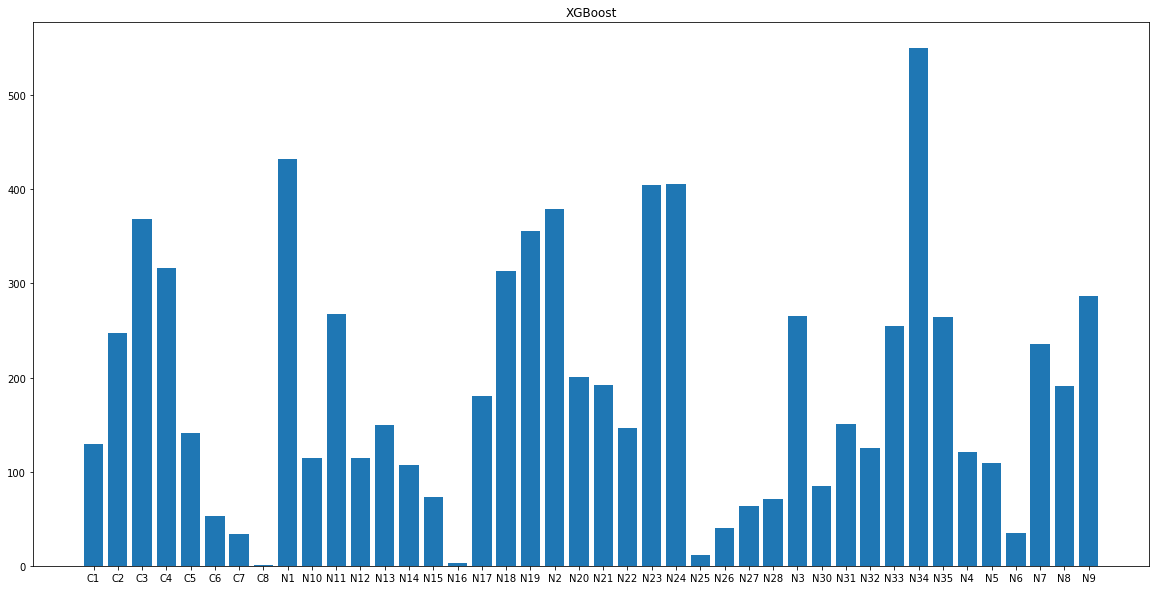

In [211]:
x,y = zip(*sorted(xgbmodel.get_fscore().items()))
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.title("XGBoost")

Text(0.5,1,'Catboost model')

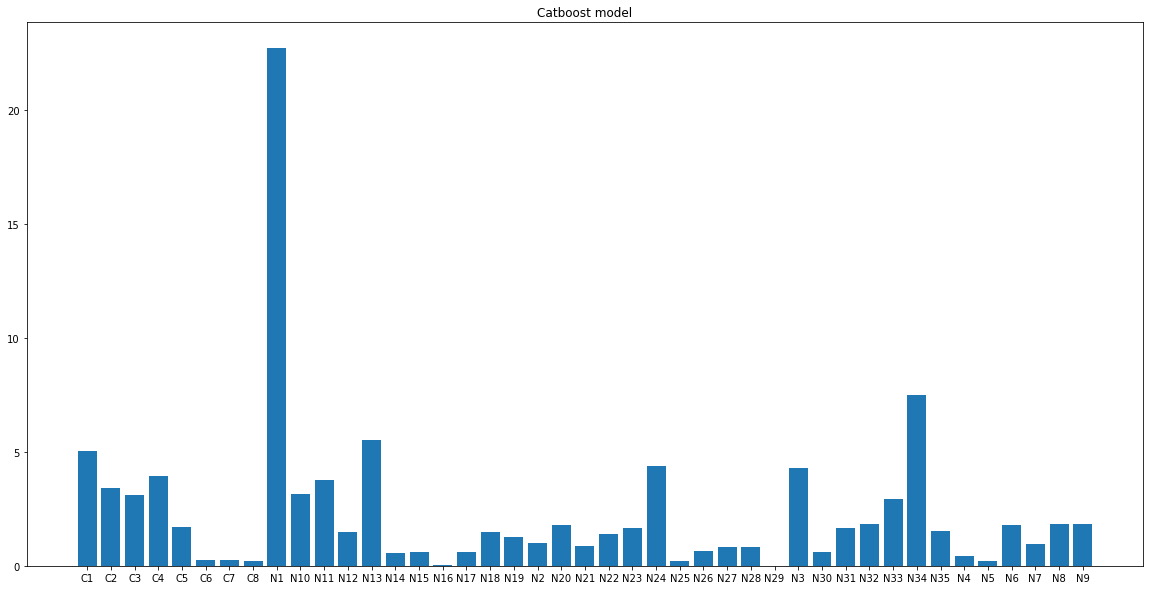

In [210]:
plt.figure(figsize=(20,10))

plt.bar(train.columns[1:-1],catmodel.feature_importances_)
plt.title('Catboost model')

Text(0.5,1,'Lightgbm')

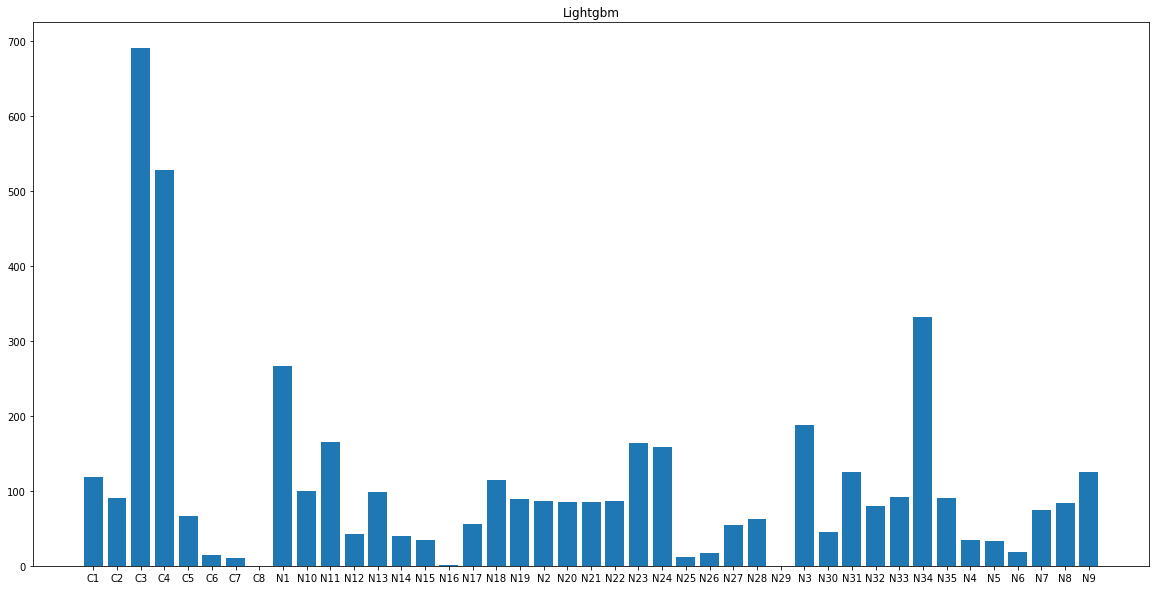

In [222]:
plt.figure(figsize=(20,10))

plt.bar(train.columns[1:-1],model.feature_importance())
plt.title('Lightgbm')

In [25]:
new = catpred*.3 +xgbpred*.5 + .2*lgbpred

In [26]:
sub = pd.DataFrame({'Unique_ID':test.Unique_ID,
                   'Class_1_Probability': new
})

In [27]:
sub.to_csv('sub.csv',index=False)